### PEQUENO TESTE 02

Este pequeno teste aborda a aplicação do método da Seção Áurea para a
minimização de uma função unidimensional. O problema de otimização abordado é
o seguinte:

    Minimizar f(x) = x^4 - 3*x^2 + x

O desafio neste teste é implementar a atualização dos pontos a, b, u e v do 
método da Seção Áurea. A atualização desses pontos é realizada nas linhas
58-59, 65-66, 76-77 e 83-84. Você só precisa completar as linhas de código com 
a atualização correta dos pontos.

Neste pequeno teste, você vai considerar o Método da Seção Áurea para resolver um problema de otimização unidimensional. O objetivo é vocês implementarem a atualização dos pontos no intervalo de busca dentro do processo interativo. Siga os seguintes os passos:

Revisando...
Em comparação com o gradiente decendente, estamos lidando com problemas unidimensionais onde não é necessário o uso de derivadas. Nele é feito uma busca global iterativa e possui uma maior eficiência, novamente, em funções unidimensionais.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14}) # trem pra aumentar a fonte 

# Definição da função-objetivo
def func(x):
    return x**4 - 3*x**2 + x

# Parâmetros gerais
a = -2 # Início do intervalo
b = 0 # Fim do intervalo
fa = func(a) # Valor da função no início do intervalo
fb = func(b) # Valor da função no fim do intervalo
precisao = 1e-3 # Precisão da busca
navaliacoes = 2 # Número de avaliações da função

Número de avaliações: 2
Ótimo aproximado: x = -1.301, f(x) = -3.514


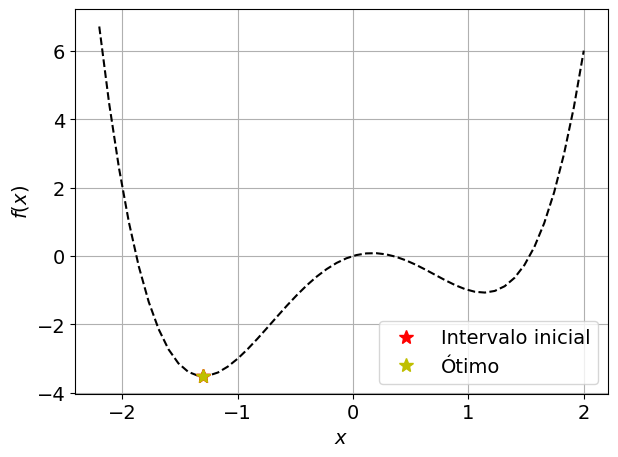

In [10]:
""" Método da Seção Áurea """

# Calcula o comprimento do intervalo
L = b-a
    
# Determina dois pontos médios
u = b - .618*L
v = a + .618*L # o valor de 0.618 é a razão áurea
    
# Avalia
fu = func(u)
fv = func(v)
navaliacoes = 2 # atualizando o n de avaliações

# Registra a curva da função-objetivo e o intervalo inicial em uma figura
x = np.linspace(-2.2, 2) # cria um vetor de pontos entre -2.2 e 2
fx = func(x) # avalia a função-objetivo nesses pontos
plt.plot(x, fx, '--k') # plota a curva da função-objetivo
plt.plot([a, b], [fa, fb], '*r', markersize=10, label='Intervalo inicial')

# Enquanto o meu intervalo não for reduzido a um tamanho suficientemente
# pequeno
while (b-a) > precisao:        # enquanto o intervalo for maior que a precisão
        
    if fu < fv: # Se o valor da função em u for menor que em v (mantemos o lado esquerdo do intervalo)
            
        """ IMPLEMENTE AQUI A ATUALIZAÇÃO DE B E F(B) """
        b = v         # O novo limite superior passa a ser v
        fb = fv       # Reutiliza o valor da função para não reavaliar
            
        # Atualiza o novo comprimento do intervalo
        L = b-a
            
        """ IMPLEMENTE AQUI A ATUALIZAÇÃO DE V E F(V) """
        v = u         # O novo v vira o antigo u
        fv = fu       # Reutiliza o valor de fu
        
        # Calcula o novo u
        u = b -.618*L
        fu = func(u)
        
    # Se fu > fv
    else:
            
        """ IMPLEMENTE AQUI A ATUALIZAÇÃO DE A E F(A) """
        a = u         # O novo limite inferior passa a ser u
        fa = fu       # Reutiliza o valor da função para não reavaliar
            
        # Atualiza o novo comprimento do intervalo
        L = b-a
            
        """ IMPLEMENTE AQUI A ATUALIZAÇÃO DE U E F(U) """
        u = v         # O novo u vira o antigo v
        fu = fv       # Reutiliza o valor de fv
            
        # Calcula o novo u
        v = a + .618*L
        fv = func(v)
        
    navaliacoes += 1

print('Número de avaliações: %d' %navaliacoes)
    
# A aproximação do meu ótimo é o meio do meu intervalo
xotimo = (a+b)/2
fxotimo = func(xotimo)
print('Ótimo aproximado: x = %.3f, f(x) = %.3f' %(xotimo, fxotimo))

# Registra o ótimo na figura
plt.plot(xotimo, fxotimo, '*y', markersize=10, label='Ótimo')
plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()